In [1]:
import os
import sys
import random
import cv2
import matplotlib
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from model import *
#from model import data_generator
from config import Config
from dataset import *

%load_ext autoreload
%autoreload 2
%matplotlib inline

Using TensorFlow backend.


### Test Input

1089


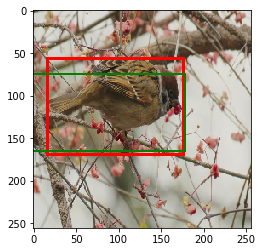

In [9]:
if sys.platform == 'darwin':
    data_path = os.path.join(os.getcwd(), '../data/train_test_a/zsl_a_animals_train_20180321')
else:
    data_path = os.path.join(os.getcwd(), '../cai_zsl/data/train_test_a/zsl_a_animals_train_20180321')
test_dataset = CAIData(root_dir=data_path, mode="validation")
test_dataset.prepare()

anchors = []
feature_strides = []
config = Config()
for i, scale in enumerate(config.ANCHOR_SCALES):
    scale_anchors = utils.generate_anchors(scales=scale, ratios=config.ANCHOR_RATIOS, shape=[8*2**i, 8*2**i],
                                          feature_stride=config.FEATURE_STRIDE/(2**i), anchor_stride=1)
    anchors.append(scale_anchors)
    feature_strides += [config.FEATURE_STRIDE/(2**i)]*scale_anchors.shape[0]
anchors = np.concatenate(anchors, axis=0)

# dataset
dataset = val_dataset

# Image ID
image_id = 45347 # random.sample(test_dataset.image_ids, 1)[0]

image, image_shape = dataset.load_image(image_id)
image_bbox, image_class_id, attribute, class_attribute = dataset.load_bbox_class_attr(image_id)

image_bbox = translate_bbox(image_bbox, input_shape=image_shape[:2], output_shape=config.IMAGE_SHAPE[:2])
image = cv2.resize(image, tuple(config.IMAGE_SHAPE[:2]))
gt_target_object, gt_target_bbox, gt_target_bbox_object = assign_bbox_to_anchors(config, image_bbox, anchors, image_id)

prior_index = np.argmax(gt_target_bbox_object)
print(prior_index)

fig2 = plt.figure()
ax2 = fig2.add_subplot(111, aspect='equal')
ax2.imshow(cv2.resize(image, tuple(config.IMAGE_SHAPE[:2])))

y1, x1, y2, x2 = image_bbox
x, y, w, h = x1, y1, x2 - x1, y2 - y1
xc, yc = x + w / 2, y + h / 2
ax2.add_patch(
            patches.Rectangle(
                (x, y),
                w,
                h,
                fill=False,      # remove background
                edgecolor = "red",
                linewidth = 3
            )
        )

py, px, ph, pw, feature_stride = anchors[prior_index]
py += feature_stride/2 - ph/2
px += feature_stride/2 - pw/2
ax2.add_patch(
                patches.Rectangle(
                    (px, py),
                    pw,
                    ph,
                    fill=False,      # remove background
                    edgecolor = "green",
                    linewidth= 2
                )
            )

### Dataset

In [29]:
if sys.platform == 'darwin':
    data_path = os.path.join(os.getcwd(), '../data/train_test_a/zsl_a_animals_train_20180321')
else:
    data_path = os.path.join(os.getcwd(), '../cai_zsl/data/train_test_a/zsl_a_animals_train_20180321')
    
train_dataset = CAIData(root_dir=data_path, mode="train")
train_dataset.prepare()

val_dataset = CAIData(root_dir=data_path, mode="validation")
val_dataset.prepare()

### Train the model

In [30]:
config = Config()
model = ZSL(mode="training", config=config, model_dir="./model/")

In [ ]:
model.keras_model.summary()

In [ ]:
model.train(train_dataset, val_dataset, 
            learning_rate=config.LEARNING_RATE, 
            epochs=15)


Starting at epoch 0. LR=0.001

Checkpoint Path: ./model/challengerai20180505T2039/yolo_challengerai_{epoch:04d}.h5


/home/ecbm4040/miniconda2/envs/dlenv/lib/python3.5/site-packages/keras/engine/training.py:2095: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


Epoch 1/15
1000/1000 [==============================] - 644s 644ms/step - loss: 74.7405 - yolo_bbox_loss: 74.7404 - val_loss: 2.1451 - val_yolo_bbox_loss: 2.1451
Epoch 2/15
1000/1000 [==============================] - 628s 628ms/step - loss: 1.4529 - yolo_bbox_loss: 1.4529 - val_loss: 1.9559 - val_yolo_bbox_loss: 1.9559
Epoch 3/15
 822/1000 [=======================>......] - ETA: 1:51 - loss: 1.3816 - yolo_bbox_loss: 1.3816

### Test detection output

In [11]:
config = Config()
model = ZSL(mode="detection", config=config, model_dir="./model/")
model.load_weights("./model/challengerai20180503T2352/yolo_challengerai_0015.h5")

In [19]:
model.keras_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
input_conv1 (Conv2D)            (None, 256, 256, 32) 896         input_image[0][0]                
__________________________________________________________________________________________________
leaky_re_lu_898 (LeakyReLU)     (None, 256, 256, 32) 0           input_conv1[0][0]                
__________________________________________________________________________________________________
input_conv2 (Conv2D)            (None, 128, 128, 64) 18496       leaky_re_lu_898[0][0]            
__________________________________________________________________________________________________
leaky_re_l

[1089, 1089, 1089, 1089, 1089, 1089, 1089, 1089]
Processing 8 images
image                    shape: (256, 256, 3)         min:    1.00000  max:  251.00000
image                    shape: (256, 256, 3)         min:    1.00000  max:  251.00000
image                    shape: (256, 256, 3)         min:    1.00000  max:  251.00000
image                    shape: (256, 256, 3)         min:    1.00000  max:  251.00000
image                    shape: (256, 256, 3)         min:    1.00000  max:  251.00000
image                    shape: (256, 256, 3)         min:    1.00000  max:  251.00000
image                    shape: (256, 256, 3)         min:    1.00000  max:  251.00000
image                    shape: (256, 256, 3)         min:    1.00000  max:  251.00000
********************************************************************************
0.149625
1
[ 112.           80.           90.50966799  181.01933598   16.        ]
0.440026 0.452043 -0.0497056 -0.135495
********************************

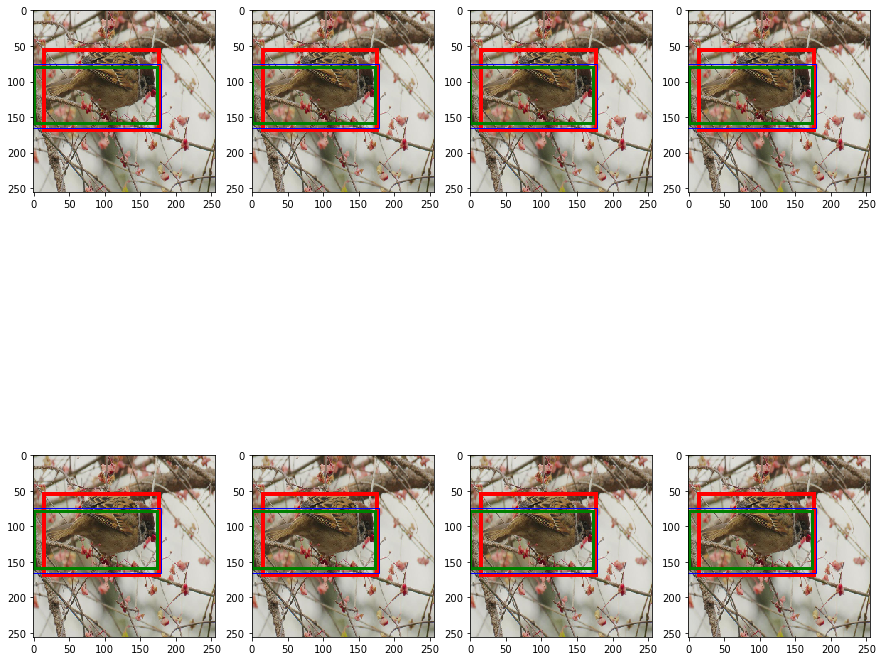

In [28]:
images = []
image_ids = []
# for i in range(config.BATCH_SIZE):
#     random_id = random.sample(val_dataset.image_ids, 1)[0]
#     image, image_shape = val_dataset.load_image(random_id)
#     images.append(image)
#     image_ids.append(random_id)
    
# find the best indexes
best_indexes = []
best_prior_boxes = []
image_ids = [45347]*8
for image_id in image_ids:
    image, image_shape = dataset.load_image(image_id)
    image_bbox, image_class_id, attribute, class_attribute = dataset.load_bbox_class_attr(image_id)

    image_bbox = translate_bbox(image_bbox, input_shape=image_shape[:2], output_shape=config.IMAGE_SHAPE[:2])
    image = cv2.resize(image, tuple(config.IMAGE_SHAPE[:2]))
    gt_target_object, gt_target_bbox, gt_target_bbox_object = assign_bbox_to_anchors(config, image_bbox, anchors, image_id)

    prior_index = np.argmax(gt_target_bbox_object)
    best_indexes.append(prior_index)
    
    py, px, ph, pw, feature_stride = anchors[prior_index]
    py += feature_stride/2 - ph/2
    px += feature_stride/2 - pw/2
    best_prior_boxes.append([py, px, ph, pw])
    
    images.append(image)
    
# detection
print(best_indexes)
output_boxes = model.detect(images, best_indexes, verbose=True)

# visualize output bounding boxes
fig2 = plt.figure(figsize=(15,15))
for i, image_id in enumerate(image_ids):
    
    # ground truth
    image, image_shape = dataset.load_image(image_id)
    image_bbox, _, _, _ = val_dataset.load_bbox_class_attr(image_id)
    translated_bbox = translate_bbox(image_bbox, input_shape=image_shape[:2], output_shape=config.IMAGE_SHAPE[:2])
    y1, x1, y2, x2 = translated_bbox
    assert x2 > x1 and y2 > y1
    x, y, w, h = x1, y1, x2-x1, y2-y1
    
    ax2 = fig2.add_subplot(241+i, aspect='equal')
    ax2.imshow(cv2.resize(image, tuple(config.IMAGE_SHAPE[:2])))
    ax2.add_patch(
                patches.Rectangle(
                    (x, y),
                    w,
                    h,
                    fill=False,      # remove background
                    edgecolor = "red",
                    linewidth = 4
                )
            )
    print(x, y, w, h)
    
    # detection
    x1, y1, x2, y2 = output_boxes[i]
    assert x2 > x1 and y2 > y1
    x, y, w, h = x1, y1, x2-x1, y2-y1
    ax2.add_patch(
                patches.Rectangle(
                    (x, y),
                    w,
                    h,
                    fill=False,      # remove background
                    edgecolor = "green",
                    linewidth = 3
                )
            )
    
    # priors
    py, px, ph, pw = best_prior_boxes[i]
    ax2.add_patch(
                patches.Rectangle(
                    (px, py),
                    pw,
                    ph,
                    fill=False,      # remove background
                    edgecolor = "blue",
                    linewidth = 1
                )
            )